## Pandas - Fortsetzung - 

<br>

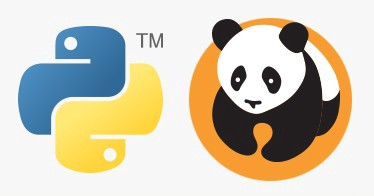

    Bildquelle: www.medium.com
<br>
<br>

In diesem Notebook werden die apply Funktion besprochen. Des weiteren werden wir concaten, mergen und appenden von Dataframes durchführen.

In [2]:
# import of package
import pandas as pd
import numpy as np

In [3]:
# read dataframe
df_birth = pd.read_csv('birthdays.csv')
df_birth.head()

,Unnamed: 0,state,year,month,day,date,wday,births
0,1,AK,1969,1,1,1969-01-01,Wed,14
1,2,AL,1969,1,1,1969-01-01,Wed,174
2,3,AR,1969,1,1,1969-01-01,Wed,78
3,4,AZ,1969,1,1,1969-01-01,Wed,84
4,5,CA,1969,1,1,1969-01-01,Wed,824


#### Data Description of Birthdays

**Source:**
calmcode.io // originally found in an R package.

**Purpose:** Der Datensatz enthält Geburtstagsdaten über die United States pro State. Das Ziel ist zu versuchen und zu entdecken von interessanten Mustern in den Daten.

**Contents:**

|Name | Descretion |
|--- | ---|
|**state** | Der US State indem derjenige geboren ist. |
|**year** | Das Jahr. |
|**month**| Der Monat.|
|**day** | Der Tag des Monats.|
|**date** | Das Datum. |
|**wday** | Der Wochentag. |

In [4]:
# delete column Unnamed
df_birth = df_birth.drop('Unnamed: 0', axis = 1)
df_birth.head()

,state,year,month,day,date,wday,births
0,AK,1969,1,1,1969-01-01,Wed,14
1,AL,1969,1,1,1969-01-01,Wed,174
2,AR,1969,1,1,1969-01-01,Wed,78
3,AZ,1969,1,1,1969-01-01,Wed,84
4,CA,1969,1,1,1969-01-01,Wed,824


### apply Funktion

In [34]:
# define a function to year only the year without 19-century
def year_xx(year):
    return year - 1900


def month_name(month):
    if month == 1: return 'jan'
    if month == 2: return 'feb'
    if month == 3: return 'mar'
    if month == 4: return 'apr'
    if month == 5: return 'mai'
    if month == 6: return 'jun'
    if month == 7: return 'jul'
    if month == 8: return 'aug'
    if month == 9: return 'sep'
    if month == 10: return 'oct'
    if month == 11: return 'nov'
    if month == 12: return 'dec'
    
    else:  return 'hallo'

In [35]:
df_birth['year'].apply(year_xx)

0         69
1         69
2         69
3         69
4         69
          ..
372859    88
372860    88
372861    88
372862    88
372863    88
Name: year, Length: 372864, dtype: int64

In [36]:
df_birth['month'].apply(month_name)

0         jan
1         jan
2         jan
3         jan
4         jan
         ... 
372859    dec
372860    dec
372861    dec
372862    dec
372863    dec
Name: month, Length: 372864, dtype: object

### List Comprehension

In [50]:
coll = ['jan' if i == 1 else 'feb' if i == 2 else 'mar' if i == 3 else 'apr' if i == 4 else 'mai' if i == 5 
 else 'jun' if i == 6 else 'jul' if i == 7 else 'aug' if i == 8 else 'sep' if i == 9 else 'oct' if i == 10
else 'nov' if i == 11 else 'dec' for i in df_birth['month']]

In [55]:
coll_month = ['jan', 'feb', 'mar', 'apr', 'mai', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df_birth['month_name'] = [coll_month[j-1] for j in df_birth['month']]

df_birth.groupby('month_name').count()

,state,year,month,day,date,wday,births
month_name,,,,,,,
apr,30641,30641,30641,30641,30641,30641,30641
aug,31620,31620,31620,31620,31620,31620,31620
dec,31620,31620,31620,31620,31620,31620,31620
feb,28921,28921,28921,28921,28921,28921,28921
jan,31620,31620,31620,31620,31620,31620,31620
jul,31620,31620,31620,31620,31620,31620,31620
jun,30644,30644,30644,30644,30644,30644,30644
mai,31620,31620,31620,31620,31620,31620,31620
mar,31620,31620,31620,31620,31620,31620,31620


### merge, concate and append

In [100]:
#df_1 has only single animals
df_1 = pd.DataFrame({'animals': ['elephant', 'monkey', 'cat', 'dog'],
                    'value': [1, 2, 3, 5]})

#df_2 has doubling of monkey and cat
df_2 = pd.DataFrame({'animals': ['monkey', 'monkey', 'cat', 'cat', 'bird'],
                    'value': [6, 7, 8, 9, 10]})

In [101]:
df_1

,animals,value
0,elephant,1
1,monkey,2
2,cat,3
3,dog,5


In [102]:
df_2

,animals,value
0,monkey,6
1,monkey,7
2,cat,8
3,cat,9
4,bird,10


In [103]:
# as we have the same column we can append both table
df_3 = df_1.append(df_2)
df_3

,animals,value
0,elephant,1
1,monkey,2
2,cat,3
3,dog,5
0,monkey,6
1,monkey,7
2,cat,8
3,cat,9
4,bird,10


In [115]:
# concat can do the same like append
df_concat_1 = pd.concat([df_1, df_2])
df_concat_1

,animals,value
0,elephant,1
1,monkey,2
2,cat,3
3,dog,5
0,monkey,6
1,monkey,7
2,cat,8
3,cat,9
4,bird,10


In [119]:
pd.concat([df_1, df_2], keys= ['df_1', 'df_2'])

animals  value
df_1 0  elephant      1
     1    monkey      2
     2       cat      3
     3       dog      5
df_2 0    monkey      6
     1    monkey      7
     2       cat      8
     3       cat      9
     4      bird     10

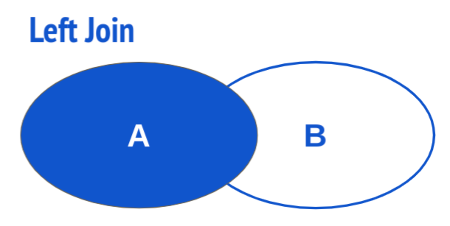

In [108]:
# left join merge
df_left_join = pd.merge(df_1, df_2, how = 'left', on = 'animals')
df_left_join

,animals,value_x,value_y
0,elephant,1,NaN
1,monkey,2,6.0
2,monkey,2,7.0
3,cat,3,8.0
4,cat,3,9.0
5,dog,5,NaN


Es wurden alle Werte des linken DataFrames genommen, jedoch wurden 'cat' und 'monkey' nun doppelte Einträgen.

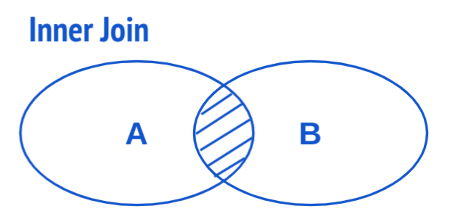

In [109]:
# inner join merge
df_inner_join = pd.merge(df_1, df_2, how = 'inner', on = 'animals')
df_inner_join

,animals,value_x,value_y
0,monkey,2,6
1,monkey,2,7
2,cat,3,8
3,cat,3,9


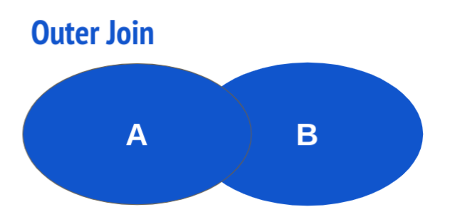

In [110]:
# outer join merge
df_outer_join = pd.merge(df_1, df_2, how = 'outer', on = 'animals')
df_outer_join

,animals,value_x,value_y
0,elephant,1.0,NaN
1,monkey,2.0,6.0
2,monkey,2.0,7.0
3,cat,3.0,8.0
4,cat,3.0,9.0
5,dog,5.0,NaN
6,bird,NaN,10.0


In [112]:
# by using indicator = True
df_ind_join = pd.merge(df_1, df_2, how = 'outer', on = 'animals', indicator = True)
df_ind_join

,animals,value_x,value_y,_merge
0,elephant,1.0,NaN,left_only
1,monkey,2.0,6.0,both
2,monkey,2.0,7.0,both
3,cat,3.0,8.0,both
4,cat,3.0,9.0,both
5,dog,5.0,NaN,left_only
6,bird,NaN,10.0,right_only


**Hinweis:** 
   * mit indicator = True kann dann anschließend nach '_merge' - Wunsch gefiltert werden!
   * ab und an ist es notwendig ein validate zu setzten (1:1 oder 1:m)!
   * Vorsichtig sein mit Duplicates!